In [12]:
import pandas as pd
import numpy as np
import os, sys, time
import matplotlib.pyplot as plt
from gridStructureAdmm import *
%matplotlib inline
%load_ext autoreload
%autoreload 2

print("Current environment directory:" + sys.prefix)
print("System version: "+sys.version)
print("Current working directory: "+os.getcwd())

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Current environment directory:/Users/emunsing/GoogleDrive/Papers/GridStructureEstimation/Coding/Python/env/bin/..
System version: 2.7.12 (default, Aug 23 2016, 08:54:23) 
[GCC 4.2.1 Compatible Apple LLVM 7.3.0 (clang-703.0.31)]
Current working directory: /Users/emunsing/GoogleDrive/Papers/GridStructureEstimation/Coding/Python


In [74]:
inputData = pd.read_csv('../../Data/MatlabData/240h_MCC.csv',header=None).transpose()
print(inputData.shape)
inputData.head()

(14, 2880)


,0,1,2,3,4,5,6,7,8,9,...,2870,2871,2872,2873,2874,2875,2876,2877,2878,2879
0,0.00000,0.0000,0.0000,0.0000,0.0000,0.00000,0.00000,0.00000,0.0000,0.0000,...,0.00000,0.00000,0.0000,0.00000,0.0000,0.00000,0.00000,0.00000,0.0000,0.0000
1,3.02020,6.8468,2.0008,8.3422,1.3891,2.98270,0.98199,0.33164,6.9741,5.4601,...,0.69175,2.79980,9.5664,0.42373,11.8950,0.37892,2.18580,0.53583,5.9704,9.6420
2,12.67500,11.0890,8.4806,11.4150,15.5290,12.15700,16.47400,5.43270,11.9490,7.8425,...,11.29200,11.76000,12.0080,6.97020,16.4110,6.53990,9.55350,9.24360,8.1731,13.9160
3,-0.84783,4.0453,-0.8540,5.5080,-4.4704,-0.62548,-5.14080,-1.61950,3.8641,3.6834,...,-3.34210,-0.94342,6.6678,-2.09480,7.5784,-2.14660,-0.67123,-3.03140,3.9848,6.4751
4,-0.92462,3.3062,-0.4918,4.7415,-2.9510,-0.85270,-3.70160,-1.25010,3.1867,2.8769,...,-2.60750,-0.77465,5.7766,-1.59720,6.8479,-1.42830,-0.82490,-2.01980,3.3682,5.0635


In [75]:
## Trim data down to a usable size
startBus = 1
endBus =0
startTimeIdx = 0
endTimeIdx = 0

(n,t) = inputData.shape
if (endBus - startBus) <=0: endBus = n
if (endTimeIdx - startTimeIdx) <= 0: endTimeIdx = t

mcc = inputData.iloc[startBus:endBus, startTimeIdx:endTimeIdx].values
(n,t) = mcc.shape       # t: time steps,  n: number of nodes
print(mcc.shape)

## Setting up for solving the problem

# Tuning parameters: Weights in minimization
k1 = 1e-3  # This set is Kekatos' experimentally determined coefficients
k2 = 5e-4
k3 = 1e-2
k4 = 1e-1
rho = 1e3

(13, 2880)


In [ ]:
B_guess = estimateB(mcc,rho,k1,k2,k3,k4,1e-3)
plt.imshow(B_guess)
plt.colorbar()

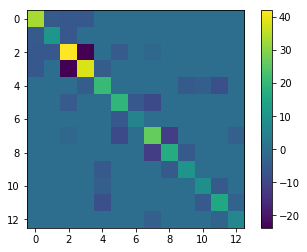

In [44]:
B = np.matrix(np.genfromtxt('../../Data/MatlabData/B_true_13bus.csv', delimiter=','))  # n x n
plt.imshow(B)
plt.colorbar()